# Load dataset

In [5]:
import os

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
    if filename.find('sequence') > -1 :
        filenames.append(filename)

In [6]:
filenames

['AFDB_04015_sequence_300_pt.csv']

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

- Split Dataset

In [8]:
record = "04015"

In [9]:
ecg_df = pd.read_csv(dataset_folder + 'AFDB_%s_sequence_300_pt.csv' % record, header=None)

In [10]:
ecg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.797897,0.305074,-0.309832,-0.672449,-0.751625,-0.157342,0.024610,0.140615,0.162627,0.171809,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.546588,-0.043854,-0.581549,-0.508020,-0.325629,-0.193490,-0.127181,-0.092357,-0.070274,-0.048430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.960319,0.666041,0.090576,-0.435385,-0.643559,-0.502777,-0.318815,-0.163411,-0.067733,-0.037986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.732785,0.151156,-0.418585,-0.689444,-0.730116,-0.362757,-0.180165,-0.035643,0.049019,0.095708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.595710,0.073838,-0.828994,-0.384247,-0.254982,-0.172842,-0.128449,-0.099942,-0.081063,-0.053073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


In [11]:
X = ecg_df.iloc[:,:300].values
y = ecg_df.iloc[:,300].values

le = LabelEncoder()
le.fit(y)

labels = le.classes_
print(" categorical label : ", labels)

y = le.transform(y)

 categorical label :  ['AF' 'N']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.33, random_state=42)

In [13]:
train_df = pd.DataFrame(np.hstack((X_train, np.expand_dims(y_train, 1))))
test_df = pd.DataFrame(np.hstack((X_test, np.expand_dims(y_test, 1))))

- 1 sequence terdiri dari 300 titik data , kolom terakhir merupakan label untuk tiap sequence

In [14]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.760259,0.667256,0.172202,-0.438343,-0.793517,-0.900137,-0.778464,-0.182297,0.031887,0.154172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.022210,0.163126,0.402891,0.619360,0.736590,0.896450,0.620351,-0.009256,-0.550189,-0.844096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.150017,0.300657,0.530192,0.878183,0.417201,-0.169648,-0.601897,-0.823499,-0.626572,-0.459947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.758806,0.528867,0.420466,0.613350,0.508146,0.524320,0.362148,0.261288,0.281600,0.243209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.038715,0.204754,0.443183,0.658258,0.777334,0.896074,0.572190,-0.072265,-0.588511,-0.890803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Balancing Dataset
Untuk kebutuhan training model, kita akan atur agar sample tiap class memiliki proporsi yang sama.

In [15]:
#print dataset distribution

train_df[300]=train_df[300].astype(int)
equilibre=train_df[300].value_counts()

print(equilibre)

1    477
0    276
Name: 300, dtype: int64


- Terlihat jika tiap katerogi memiliki jumlah sample yang berbeda.

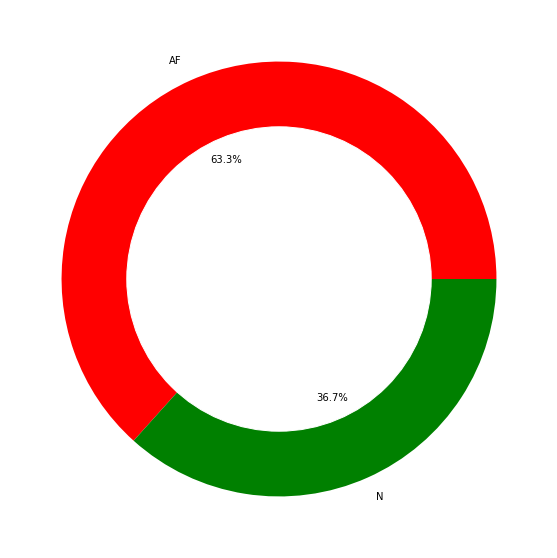

In [16]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, 
        labels=labels, 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- kita akan membuat seluruh class memiliki jumlah sample sebanyak 20000. 
- Sehingga untuk class `0` yang memiliki sample 72471, akan dilakukan pemilihan acak sebanyak 20000 dengan menggunakan Pandas Dataframe `.sample()`.
- Untuk class lainya, karena dibawah 20000 sample, akan diterapkan proses upsampling menjadi 20000 sample menggunakan sklearn `resample()`.

In [17]:
# sampling and resampling dataset

from sklearn.utils import resample
n_samples = 400 
random_states = [42, 123]

dfs = []

for i in range(len(equilibre)):
    dfs.append(train_df[train_df[300]==i])
    if(equilibre[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

train_df=pd.concat(dfs)

In [18]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
307,0.833904,0.207152,-0.397542,-0.668491,-0.634373,-0.546505,-0.427151,-0.324006,-0.294306,-0.293491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
741,1.000000,0.778792,0.197233,-0.654853,-0.752628,-0.701510,-0.627383,-0.488274,-0.260168,-0.056887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
317,0.674936,0.488537,-0.049248,-0.626829,-0.884667,-0.843798,-0.636090,-0.384375,-0.250414,-0.111268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
215,0.469226,0.181124,-0.403801,-0.702536,-0.506650,-0.337309,-0.155400,-0.136786,-0.138115,-0.139813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
523,0.784225,0.635789,0.161298,-0.408026,-0.840968,-0.476333,-0.281531,-0.145781,-0.042994,-0.015484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Sekarang kita memiliki dataset yang sudah balance.

In [19]:
# cek balanced dataset

equilibre=train_df[300].value_counts()

print(equilibre)

1    400
0    400
Name: 300, dtype: int64


## Understanding ECG Signal
- Sekarang kita ambil 1 sample tiap class untuk melihat profile heart beat masing-masing class.
- Ini berguna untuk kita agar dapat memahami karakteristik sinyal ECG untuk tiap class.
- Task ini mudah dilakukan menggunakan pandas,  `.groupby()` pada kolom 187 (kolom class) dan dengan menggunakan fungsi `.apply()` kita ambil 1 sample data menggunakan `.sample()`.

In [20]:
ECG_PER_CLASS =train_df.groupby(300,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [21]:
ECG_PER_CLASS

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
203,0.609229,0.449322,-0.026856,-0.793302,-0.710015,-0.216740,-0.134290,-0.09130,-0.061680,-0.071460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
485,0.102059,0.272205,0.496592,0.652908,0.730930,0.771381,0.539845,-0.02487,-0.705421,-0.584739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


- Pertama kita plot tiap sample pada dataframe `ECG_PER_CLASS` menggunakan pandas `.plot()`.
- Setelah itu kita plot 2D histogram untuk keseluruhan sample ECG tiap class menggunakan fungsi `plot_hist()` yang kita buat dibawah.
- Pada plot histogram, daerah dengan intensitas lebih terang menandakan banyak titik sample pada waktu dan nilai ECG tersebut.
- Sebaliknya untuk daerah yang lebih gelap.

In [22]:
def plot_1_sample(class_number, fs=250):
    data = ECG_PER_CLASS.iloc[class_number,:300]
    times = np.arange(data.shape[0], dtype='float') / fs * 1000
    
    plt.plot(times, data)
    plt.title("Plot 1 sample in class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

In [23]:
def plot_hist(class_number, min_, size, fs=250):
    # filter data berdasarkan class_number 
    ECG=train_df.loc[train_df[300]==class_number].values
    
    # scale tm value (*1000) agar bisa ditampilkan dalam satuam (ms)
    tm = np.arange(ECG.shape[1], dtype='float') / fs * 1000
    
    # ambil data hanya pada kolom `min_` sampai `size`
    # convert ke 1D array
    ECG=ECG[:,min_:size]
    ECG_flatten=ECG.flatten()
    
    # generate time data untuk tiap kolom sample, 
    # ulang sebanyak ECG.shape[0]
    times = np.tile(tm[min_:size], ECG.shape[0]) 

    # plot sebagai 2D histogram
    plt.hist2d(times, ECG_flatten, bins=(80,80), cmap=plt.cm.jet)
    plt.title("2D histogram on class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

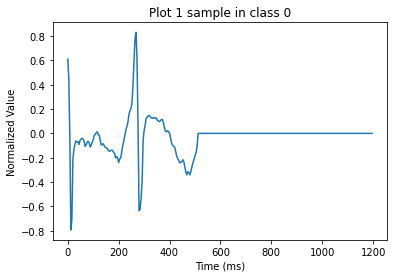

In [24]:
plot_1_sample(class_number=0)

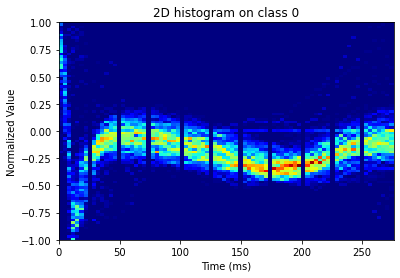

In [25]:
plot_hist(class_number=0, min_=0, size=70)

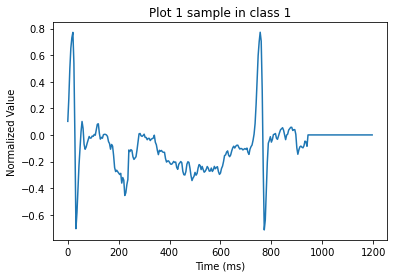

In [26]:
plot_1_sample(class_number=1)

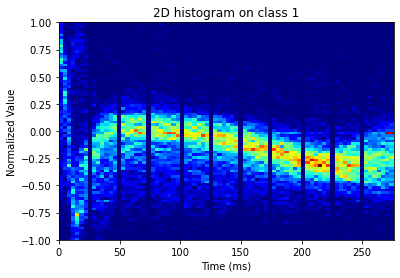

In [27]:
plot_hist(class_number=1, min_=0, size=70)

### Save Balanced Training Data and Test Data

In [25]:
train_df.to_csv(dataset_folder + "train_AFDB_%s_balanced.csv" % record, header=None, index=None)
test_df.to_csv(dataset_folder + "test_AFDB_%s.csv" % record, header=None, index=None)